# Import data

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\MyData\\14_Crawler\\0_Crawler'

In [3]:
# read data
data_frame = pd.read_csv("immoscout_data_clean_20200314_135629.csv", sep=';')
data_frame.head()

,price,size,location,real_estate,ownership,location_first,location_last,crawled
0,1080000,142,"Gröbenzell, Fürstenfeldbruck (Kreis)",Haus,Kauf,Gröbenzell,Fürstenfeldbruck (Kreis),20200314_135629
1,1198300,"136,12","Eichenau, Fürstenfeldbruck (Kreis)",Haus,Kauf,Eichenau,Fürstenfeldbruck (Kreis),20200314_135629
2,849000,"112,94","Maisach, Fürstenfeldbruck (Kreis)",Haus,Kauf,Maisach,Fürstenfeldbruck (Kreis),20200314_135629
3,1080000,142,"Gröbenzell, Fürstenfeldbruck (Kreis)",Haus,Kauf,Gröbenzell,Fürstenfeldbruck (Kreis),20200314_135629
4,1486897,1035,"Eichenau, Fürstenfeldbruck (Kreis)",Haus,Kauf,Eichenau,Fürstenfeldbruck (Kreis),20200314_135629


# Convert and clean up data

In [4]:
# convert price and size
data_frame['size'] = data_frame['size'].apply(lambda x : x.replace(",", "."))
data_frame['size'] = pd.to_numeric(data_frame['size'])
data_frame['price'] = pd.to_numeric(data_frame['price'], errors='coerce')

In [5]:
# convert crawled into datetime
data_frame['date_time_crawled'] = pd.to_datetime(data_frame['crawled'], format='%Y%m%d_%H%M%S', utc=False)
data_frame['price_per_sqm'] = data_frame['price']/data_frame['size']

In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              1094 non-null   float64       
 1   size               1121 non-null   float64       
 2   location           1121 non-null   object        
 3   real_estate        1121 non-null   object        
 4   ownership          1121 non-null   object        
 5   location_first     1121 non-null   object        
 6   location_last      1121 non-null   object        
 7   crawled            1121 non-null   object        
 8   date_time_crawled  1121 non-null   datetime64[ns]
 9   price_per_sqm      1094 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 87.7+ KB


In [7]:
data_frame.head()

,price,size,location,real_estate,ownership,location_first,location_last,crawled,date_time_crawled,price_per_sqm
0,1080000.0,142.00,"Gröbenzell, Fürstenfeldbruck (Kreis)",Haus,Kauf,Gröbenzell,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,7605.633803
1,1198300.0,136.12,"Eichenau, Fürstenfeldbruck (Kreis)",Haus,Kauf,Eichenau,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,8803.261828
2,849000.0,112.94,"Maisach, Fürstenfeldbruck (Kreis)",Haus,Kauf,Maisach,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,7517.265805
3,1080000.0,142.00,"Gröbenzell, Fürstenfeldbruck (Kreis)",Haus,Kauf,Gröbenzell,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,7605.633803
4,1486897.0,1035.00,"Eichenau, Fürstenfeldbruck (Kreis)",Haus,Kauf,Eichenau,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,1436.615459


In [8]:
data_frame.describe()

,price,size,price_per_sqm
count,1.094000e+03,1121.000000,1094.000000
mean,1.621038e+06,789.167110,inf
std,1.807667e+06,3175.386961,NaN
min,1.000000e+00,0.000000,0.003279
25%,7.980000e+05,150.000000,2303.438228
50%,1.102500e+06,222.000000,5703.539424
75%,1.690000e+06,504.000000,7768.817204
max,1.800000e+07,52168.000000,inf


In [9]:
data_frame['real_estate'].value_counts()

Haus           836
Grundstueck    285
Name: real_estate, dtype: int64

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


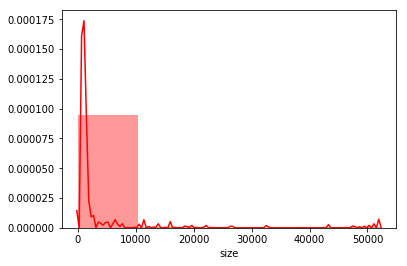

In [10]:
sns.distplot(data_frame['size'],bins=5,kde=True,color='red')

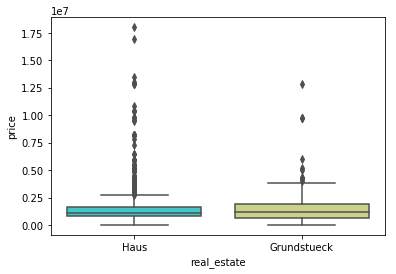

In [11]:
sns.boxplot(x='real_estate',y='price',data=data_frame,palette='rainbow')

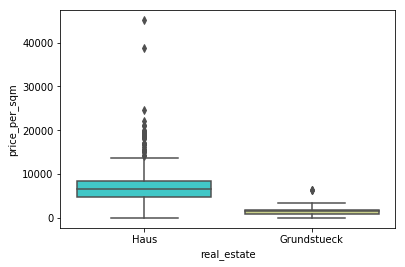

In [12]:
sns.boxplot(x='real_estate',y='price_per_sqm',data=data_frame,palette='rainbow')

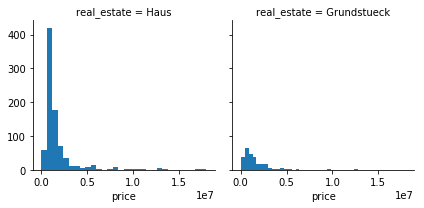

In [13]:
g = sns.FacetGrid(data=data_frame,col='real_estate')
g.map(plt.hist,'price', bins=30)

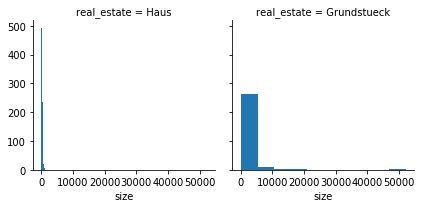

In [14]:
g = sns.FacetGrid(data=data_frame,col='real_estate')
g.map(plt.hist,'size', bins = 10)

In [15]:
data_frame['price_per_sqm'] = data_frame['price']/data_frame['size']

# filter our all with 0 and values that are super high

In [16]:
data = data_frame.dropna(axis=0)
data = data[data['size']>=10]
data = data[data['price']>=10000]
data = data[data['price_per_sqm']>=50]

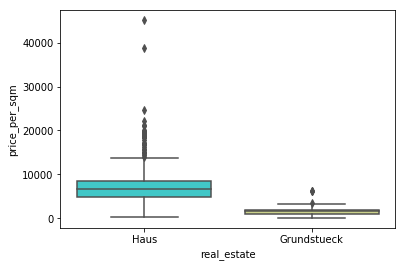

In [17]:
sns.boxplot(x='real_estate',y='price_per_sqm',data=data,palette='rainbow')

In [18]:
data.describe()

,price,size,price_per_sqm
count,1.072000e+03,1072.000000,1072.000000
mean,1.649882e+06,449.706465,5898.603917
std,1.814594e+06,820.239059,4206.851477
min,1.530000e+05,26.000000,68.529862
25%,7.997500e+05,149.830000,2456.956253
50%,1.142500e+06,211.715000,5849.216301
75%,1.695000e+06,486.300000,7838.124141
max,1.800000e+07,14000.000000,45066.666667


In [19]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'

data = data[np.abs(data['price_per_sqm'] - data['price_per_sqm'].mean()) <= (3*data['price_per_sqm'].std())]
data

,price,size,location,real_estate,ownership,location_first,location_last,crawled,date_time_crawled,price_per_sqm
0,1080000.0,142.00,"Gröbenzell, Fürstenfeldbruck (Kreis)",Haus,Kauf,Gröbenzell,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,7605.633803
1,1198300.0,136.12,"Eichenau, Fürstenfeldbruck (Kreis)",Haus,Kauf,Eichenau,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,8803.261828
2,849000.0,112.94,"Maisach, Fürstenfeldbruck (Kreis)",Haus,Kauf,Maisach,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,7517.265805
3,1080000.0,142.00,"Gröbenzell, Fürstenfeldbruck (Kreis)",Haus,Kauf,Gröbenzell,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,7605.633803
4,1486897.0,1035.00,"Eichenau, Fürstenfeldbruck (Kreis)",Haus,Kauf,Eichenau,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,1436.615459
...,...,...,...,...,...,...,...,...,...,...
1116,9700000.0,1543.00,"Starnberg, Starnberg (Kreis)",Grundstueck,Kauf,Starnberg,Starnberg (Kreis),20200314_135629,2020-03-14 13:56:29,6286.454958
1117,1450000.0,643.00,"Aubing, München",Grundstueck,Kauf,Aubing,München,20200314_135629,2020-03-14 13:56:29,2255.054432
1118,1700000.0,675.00,"Trudering, München",Grundstueck,Kauf,Trudering,München,20200314_135629,2020-03-14 13:56:29,2518.518519
1119,990000.0,942.00,"Bruckmühl, Rosenheim (Kreis)",Grundstueck,Kauf,Bruckmühl,Rosenheim (Kreis),20200314_135629,2020-03-14 13:56:29,1050.955414


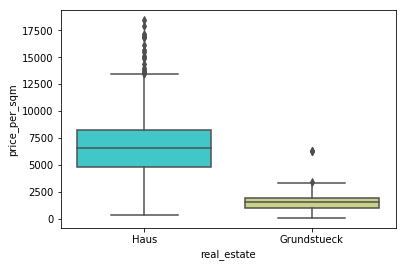

In [20]:
sns.boxplot(x='real_estate',y='price_per_sqm',data=data,palette='rainbow')

# Geocoding and visualization

In [21]:
# imports
from ratelimit import limits, sleep_and_retry
from geopy.geocoders import Nominatim
from tqdm import tqdm

In [22]:
#progress bar pandas
tqdm.pandas()

In [23]:
gc = Nominatim(user_agent="fintu-blog-geocoding-python", country_bias='Germany')
gc.geocode("Unter den Linden 1, Berlin")

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `country_bias` argument of the Nominatim.__init__ is deprecated and will be removed in geopy 2.0. Use Nominatim.geocode(country_codes='Germany') instead.
  """Entry point for launching an IPython kernel.


Location(Kommandantenhaus, 1, Unter den Linden, Spandauer Vorstadt, Mitte, Berlin, 10117, Deutschland, (52.51720765, 13.397834399325466, 0.0))

In [24]:
loc = gc.geocode(data['location_first'][1], data['location_last'][1])

In [25]:
loc

Location(Eichenau, Landkreis Fürstenfeldbruck, Bayern, 82223, Deutschland, (48.17256, 11.3223214, 0.0))

In [26]:
#@sleep_and_retry
#@limits(1,1)
def rate_limited_geocode(query):
    loc = gc.geocode(query)
    if loc is None:
        return None
    else: 
        return loc.raw

def geocode(row):
    lookup_query = row["location_first"]
    lookup_result = rate_limited_geocode(lookup_query)
    return lookup_result

In [27]:
##data['geo_location'] = data.progress_apply(geocode, axis=1)

In [28]:
#data.to_csv("2020-03-14_data_cleaned.csv", sep=',')
data = pd.read_csv("2020-03-14_data_cleaned.csv", sep=',')
data_clean = data.dropna()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 0 to 1050
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1037 non-null   int64  
 1   price              1037 non-null   float64
 2   size               1037 non-null   float64
 3   location           1037 non-null   object 
 4   real_estate        1037 non-null   object 
 5   ownership          1037 non-null   object 
 6   location_first     1037 non-null   object 
 7   location_last      1037 non-null   object 
 8   crawled            1037 non-null   object 
 9   date_time_crawled  1037 non-null   object 
 10  price_per_sqm      1037 non-null   float64
 11  geo_location       1037 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 105.3+ KB


# Show data first

In [29]:
data

,Unnamed: 0,price,size,location,real_estate,ownership,location_first,location_last,crawled,date_time_crawled,price_per_sqm,geo_location
0,0,1080000.0,142.00,"Gröbenzell, Fürstenfeldbruck (Kreis)",Haus,Kauf,Gröbenzell,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,7605.633803,"{'place_id': 235563574, 'licence': 'Data © Ope..."
1,1,1198300.0,136.12,"Eichenau, Fürstenfeldbruck (Kreis)",Haus,Kauf,Eichenau,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,8803.261828,"{'place_id': 235198709, 'licence': 'Data © Ope..."
2,2,849000.0,112.94,"Maisach, Fürstenfeldbruck (Kreis)",Haus,Kauf,Maisach,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,7517.265805,"{'place_id': 235356921, 'licence': 'Data © Ope..."
3,3,1080000.0,142.00,"Gröbenzell, Fürstenfeldbruck (Kreis)",Haus,Kauf,Gröbenzell,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,7605.633803,"{'place_id': 235563574, 'licence': 'Data © Ope..."
4,4,1486897.0,1035.00,"Eichenau, Fürstenfeldbruck (Kreis)",Haus,Kauf,Eichenau,Fürstenfeldbruck (Kreis),20200314_135629,2020-03-14 13:56:29,1436.615459,"{'place_id': 235198709, 'licence': 'Data © Ope..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,1116,9700000.0,1543.00,"Starnberg, Starnberg (Kreis)",Grundstueck,Kauf,Starnberg,Starnberg (Kreis),20200314_135629,2020-03-14 13:56:29,6286.454958,"{'place_id': 235558251, 'licence': 'Data © Ope..."
1047,1117,1450000.0,643.00,"Aubing, München",Grundstueck,Kauf,Aubing,München,20200314_135629,2020-03-14 13:56:29,2255.054432,"{'place_id': 17565920, 'licence': 'Data © Open..."
1048,1118,1700000.0,675.00,"Trudering, München",Grundstueck,Kauf,Trudering,München,20200314_135629,2020-03-14 13:56:29,2518.518519,"{'place_id': 25479313, 'licence': 'Data © Open..."
1049,1119,990000.0,942.00,"Bruckmühl, Rosenheim (Kreis)",Grundstueck,Kauf,Bruckmühl,Rosenheim (Kreis),20200314_135629,2020-03-14 13:56:29,1050.955414,"{'place_id': 235533165, 'licence': 'Data © Ope..."


In [34]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 0 to 1050
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1037 non-null   int64  
 1   price              1037 non-null   float64
 2   size               1037 non-null   float64
 3   location           1037 non-null   object 
 4   real_estate        1037 non-null   object 
 5   ownership          1037 non-null   object 
 6   location_first     1037 non-null   object 
 7   location_last      1037 non-null   object 
 8   crawled            1037 non-null   object 
 9   date_time_crawled  1037 non-null   object 
 10  price_per_sqm      1037 non-null   float64
 11  geo_location       1037 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 105.3+ KB


In [32]:
def create_marker(row):
    loc = row["geo_location"]
    name = row["real_estate"] + ", " + row['location_first'] + ", " + str(row['price_per_sqm'])
    lat_lon = (int(loc['lat']), int(loc['lon']))
    return Marker(location=lat_lon,
                    draggable=False,
                    title=name)

In [33]:
from ipyleaflet import Map, Marker, MarkerCluster
m = Map(center=(52.204793, 360.121558),zoom=4, scroll_wheel_zoom=True)
markers = data_clean.apply(create_marker, axis=1)
marker_cluster = MarkerCluster(markers=tuple(markers.values))
m.add_layer(marker_cluster)
m

TypeError: string indices must be integers

In [ ]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, CircleMarker, LayerGroup

In [ ]:
data_houses = data_clean[data_clean['real_estate']=='Haus']
data_properties = data_clean[data_clean['real_estate']!='Haus']

In [ ]:
background = basemap_to_tiles(basemaps.OpenStreetMap.DE)
map_houses = Map(layers=(background, ),        
        zoom=5,
        scroll_wheel_zoom=True)

highest_price = data_houses["price_per_sqm"].max()

def create_marker(row):
    loc = row["geo_location"]
    name = row["real_estate"] + ", " + row['location_first'] + ", " + str(row['price_per_sqm'])
    lat_lon = (float(loc['lat']), float(loc['lon']))
    size = int((row["price_per_sqm"]/highest_price)*15)   
    if row["real_estate"] == 'Haus':
        color = "#0033FF"
    else:
        color = "#5d9167"
    return CircleMarker(location=lat_lon,
                    draggable=False,
                    title=name,
                    radius=size,
                    weight=1,
                    color=color,
                       fill=False)

markers = data_houses.apply(create_marker, axis=1)
layer_group = LayerGroup(layers=tuple(markers.values))
map_houses.add_layer(layer_group)

map_houses

In [ ]:
background = basemap_to_tiles(basemaps.OpenStreetMap.DE)
map_prop = Map(layers=(background, ),        
        zoom=5,
        scroll_wheel_zoom=True)

highest_price = data_properties["price_per_sqm"].max()

def create_marker(row):
    loc = row["geo_location"]
    name = row["real_estate"] + ", " + row['location_first'] + ", " + str(row['price_per_sqm'])
    lat_lon = (float(loc['lat']), float(loc['lon']))
    size = int((row["price_per_sqm"]/highest_price)*15)   
    if row["real_estate"] == 'Haus':
        color = "#0033FF"
    else:
        color = "#5d9167"
    return CircleMarker(location=lat_lon,
                    draggable=False,
                    title=name,
                    radius=size,
                    weight=1,
                    color=color,
                    fill=True)

markers = data_properties.apply(create_marker, axis=1)
layer_group = LayerGroup(layers=tuple(markers.values))
map_prop.add_layer(layer_group)

map_prop